# Download das bibliotecas

In [1]:
%pip install --upgrade pip
%pip install tensorflow
%pip install tensorflow-gpu
%pip install matplotlib
%pip install scipy
%pip install pandas
%pip install opencv_python
%pip install numpy
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached python_version-0.0.2-py2.py3-none-any.whl (3.4 kB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\Ricardo\AppData\Local\Temp\pip-install-ib1w9y4z\tensorflow-gpu_a37dad6402ee4c63b7b398dbca447815\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
ERROR: Could not bu

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Treinamento do modelo

### Carregando o Dataset Pessoal

In [ ]:
import os

train_path = "../datasets/personal/clean/64x64/train/"
test_path  = "../datasets/personal/clean/64x64/test/"

classes = os.listdir(train_path)
classes = sorted(classes)
n_classes = len(classes)
print(f"Classes: {classes}")

input_shape = (64, 64, 3)
file_count = []

for fld in os.listdir(train_path):
    crt = os.path.join(train_path, fld)
    image_count = len(os.listdir(crt))
    file_count.append(image_count)
    print(f'{crt} contains {image_count} images')

print(f'\nTotal number of images: {sum(file_count)}')

### Carregando o dataset - Lucas Lacerda
https://github.com/lucaaslb/cnn-libras/tree/master

In [2]:
import os

train_path = "../datasets/libras/64x64/train/"
test_path  = "../datasets/libras/64x64/test/"

classes = os.listdir(train_path)
classes = sorted(classes)
n_classes = len(classes)
print(f"Classes: {classes}")

input_shape = (64, 64, 3)  # InceptionV3 input size
file_count = []

for fld in os.listdir(train_path):
    crt = os.path.join(train_path, fld)
    image_count = len(os.listdir(crt))
    file_count.append(image_count)
    print(f'{crt} contains {image_count} images')

print(f'\nTotal number of images: {sum(file_count)}')

Classes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Y']
../datasets/libras/64x64/train/A contains 1615 images
../datasets/libras/64x64/train/B contains 1615 images
../datasets/libras/64x64/train/C contains 1615 images
../datasets/libras/64x64/train/D contains 1615 images
../datasets/libras/64x64/train/E contains 1615 images
../datasets/libras/64x64/train/F contains 1615 images
../datasets/libras/64x64/train/G contains 1615 images
../datasets/libras/64x64/train/I contains 1615 images
../datasets/libras/64x64/train/L contains 1615 images
../datasets/libras/64x64/train/M contains 1615 images
../datasets/libras/64x64/train/N contains 1615 images
../datasets/libras/64x64/train/O contains 1615 images
../datasets/libras/64x64/train/P contains 1615 images
../datasets/libras/64x64/train/Q contains 1615 images
../datasets/libras/64x64/train/R contains 1615 images
../datasets/libras/64x64/train/S contains 1615 images
../datasets/libras/64

### Criando Generators

In [3]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import preprocess_input

# Define channel place
keras.backend.set_image_data_format('channels_last')

## Define constants
BATCH_SIZE = 32
SEED = 123

## Data augmentation and preprocessing
# Training Gen
train_data_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    rescale=1./255,
)

train_generator = train_data_generator.flow_from_directory(
    train_path,
    target_size=input_shape[:2],
    shuffle=True,
    seed=SEED,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    subset="training"
)

# Validation Gen
val_data_generator = ImageDataGenerator(
    validation_split=0.2,
    preprocessing_function=preprocess_input,
    rescale=1./255,
)

validation_generator = val_data_generator.flow_from_directory(
    train_path,
    target_size=input_shape[:2],
    shuffle=False,
    seed=SEED,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    subset="validation"
)

# Test Gen
test_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rescale=1./255,
)
test_generator = test_generator.flow_from_directory(
    test_path,
    target_size=input_shape[:2],
    shuffle=False,
    seed=SEED,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
)

## Image quantity
train_samples = train_generator.samples
validation_samples = validation_generator.samples
test_samples = test_generator.samples

Found 27132 images belonging to 21 classes.
Found 6782 images belonging to 21 classes.
Found 11548 images belonging to 21 classes.


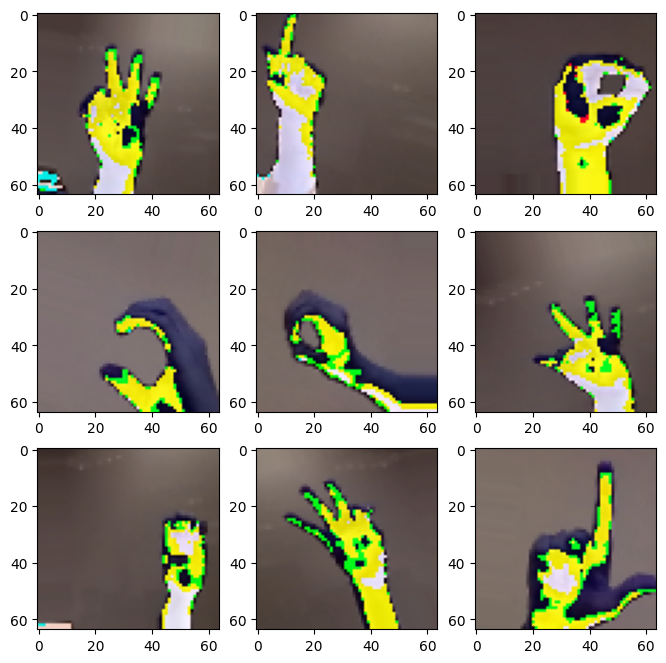

In [4]:
import matplotlib.pyplot as plt

# Visualize Examples
plt.figure(figsize=(8,8))

for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = train_generator.next()[0]*255
    image = batch[0].astype('uint8')
    plt.imshow(image)

plt.show()

### Carregando o modelo

In [5]:
from keras.applications import ResNet50
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam

# Load the ResNet50 model with pre-trained weights (excluding top layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Add custom top layers for your specific task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(n_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

94765736/94765736 [==============================] - 10s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 70, 70, 3)            0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 32, 32, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 32, 32, 64)           256       ['conv1_conv[0][0]']          
 on)                        

### Compilando e treinando o modelo

In [6]:
import tensorflow as tf

# Verifique se uma GPU está disponível
if tf.test.gpu_device_name():
    print('GPU encontrada:')
    print(tf.test.gpu_device_name())
else:
    print('GPU não encontrada.')

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Limitar a alocação de memória da GPU
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "GPU(s) física(s),", len(logical_gpus), "GPU(s) lógica(s)")
    except RuntimeError as e:
        print(e)

GPU não encontrada.


In [7]:
EPOCHS = 50
filepath='./ResNet50/libras/'
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath=f'{filepath}resnet50_weights.h5',
        monitor='val_accuracy',
        mode='max',
        save_best_only=True,
        save_weights_only=True,
        verbose=1
    ),
    keras.callbacks.ModelCheckpoint(
        filepath=f'{filepath}resnet50_model.h5',
        monitor='val_loss',
        mode='min',
        save_best_only=True,
        save_weights_only=False,
        verbose=1
    ),
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=30,
        restore_best_weights=True,
        verbose=1,
    ),
]

# Compiling Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

#Training
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=train_samples//BATCH_SIZE,
    callbacks = callbacks_list,
    validation_data=validation_generator,
    verbose = 1,
    validation_steps=validation_samples//BATCH_SIZE,
)

Epoch 1/50
847/847 [==============================] - ETA: 0s - loss: 0.5108 - accuracy: 0.8440
Epoch 1: val_accuracy improved from -inf to 0.31206, saving model to ./ResNet50/libras\resnet50_weights.h5

Epoch 1: val_loss improved from inf to 2.29624, saving model to ./ResNet50/libras\resnet50_model.h5


c:\Users\Ricardo\Documents\GitHub\Pessoal\TCC\python-tcc\training\.venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


847/847 [==============================] - 1167s 1s/step - loss: 0.5108 - accuracy: 0.8440 - val_loss: 2.2962 - val_accuracy: 0.3121
Epoch 2/50
847/847 [==============================] - ETA: 0s - loss: 0.1753 - accuracy: 0.9500
Epoch 2: val_accuracy improved from 0.31206 to 0.89040, saving model to ./ResNet50/libras\resnet50_weights.h5

Epoch 2: val_loss improved from 2.29624 to 0.53929, saving model to ./ResNet50/libras\resnet50_model.h5
847/847 [==============================] - 1217s 1s/step - loss: 0.1753 - accuracy: 0.9500 - val_loss: 0.5393 - val_accuracy: 0.8904
Epoch 3/50
  6/847 [..............................] - ETA: 18:39 - loss: 0.0802 - accuracy: 0.9740

KeyboardInterrupt: 

# Testes

In [ ]:
import itertools
import pandas as pd
import numpy as np

def classification_report_csv(report):
  report_data = []
  lines = report.split('\n')
  for line in lines[2:-3]:
      row = {}
      row_data = [d for d in line.split(' ') if d!='']
      if (len(row_data) == 5):
        row['class'] = row_data[0]
        row['precision'] = float(row_data[1])
        row['recall'] = float(row_data[2])
        row['f1_score'] = float(row_data[3])
        row['support'] = float(row_data[4])
        report_data.append(row)
  dataframe = pd.DataFrame.from_dict(report_data)
  dataframe.to_csv(f'{filepath}classification_report.csv', index = False)

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(f'{filepath}confusion_matrix.png')

In [ ]:
# Training curves
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs_x = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,15))

plt.subplot(2,1,1)
plt.plot(epochs_x, loss_values, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2,1,2)
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs_x, acc_values, 'bo', label='Training acc')
plt.plot(epochs_x, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()
plt.savefig(f'{filepath}training_curves.png')

In [ ]:
# Validation
score = model.evaluate(validation_generator)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

# test
score = model.evaluate(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
# Some reports
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# On test dataset
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
target_names = classes

# Confution Matrix
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')

# Classification Report
print('Classification Report')
report = classification_report(test_generator.classes, y_pred, target_names=target_names)
classification_report_csv(report)
print(report)